<a href="https://colab.research.google.com/github/Adisu-bezu/alx-pre_course/blob/main/Sales_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
!pip install pandas

And now we can import this package like so:

In [2]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [3]:
path = "/content/drive/MyDrive/Cognizant AI/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [6]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

The df.columns attribute returns a list of the column names in the DataFrame.

In [8]:
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

Based on the output of `df.dtypes`,

It appears that the `transaction_id`, `timestamp`, `product_id`, `category`, `customer_type`, and `payment_type` columns are of object data type, which usually means they contain string values.

The `unit_price` column is of float64 data type, which means it contains decimal numbers

The `quantity` and `total` columns are of int64 and float64 data types, respectively, which means they contain whole numbers and decimal numbers.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


The df.info() method provides more detailed information about the DataFrame.

 It shows that the DataFrame has 7829 entries, with a total of 9 columns.

 The Non-Null Count column shows that all columns have 7829 non-null values, which means there are no missing values in the DataFrame.

The memory usage column indicates how much memory the DataFrame is using.

In [5]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The df.describe() method provides summary statistics for the numeric columns in the DataFrame.

From the output, we can see that:

The unit_price column has a mean of 7.82, a standard deviation of 5.39, a minimum value of 0.19, and a maximum value of 23.99.

The quantity column has a mean of 2.50, a standard deviation of 1.12, a minimum value of 1, and a maximum value of 4.

The total column has a mean of 19.71, a standard deviation of 17.45, a minimum value of 0.19, and a maximum value of 95.96.

The percentiles provide information on how the data is distributed, with the median being the value that separates the bottom 50% from the top 50%. The 25% percentile indicates that 25% of the transactions have a total value less than 6.57, while the 75% percentile indicates that 75% of the transactions have a total value less than 28.47.



---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [ ]:
!pip install seaborn

In [9]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [35]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = data.corr()
  sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

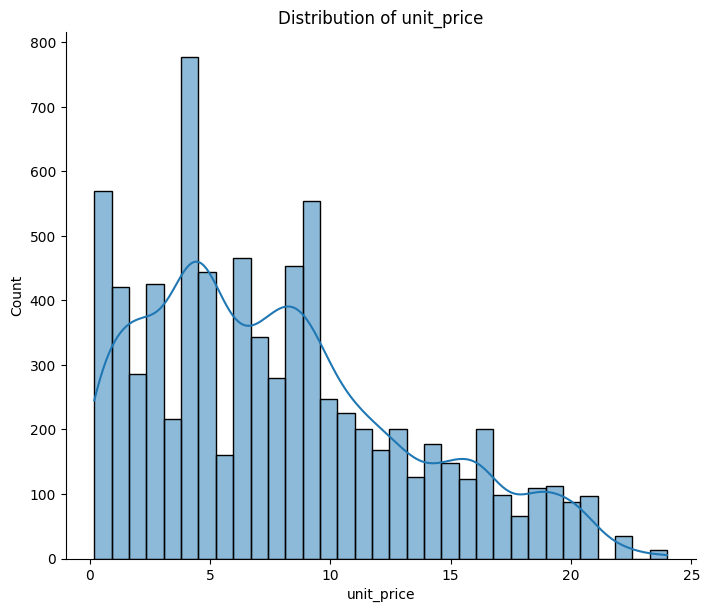

In [15]:
plot_continuous_distribution(df, 'unit_price', 6)

The plot shows the distribution of the unit_price column in the DataFrame using a histogram and a kernel density estimate (KDE) plot.

The x-axis represents the range of unit prices in the DataFrame, and the y-axis represents the frequency of occurrence of each unit price value.

The histogram shows the distribution of unit prices in the DataFrame using bars of varying heights. The height of each bar represents the number of transactions that fall within a particular range of unit prices.

The plot shows that the majority of the transactions in the DataFrame have relatively small unit prices that fall within the range of 0 to 10 unit prices. The histogram bars in this range are much higher than the bars in other ranges, indicating that there are many more transactions with these lower unit prices.

There are relatively fewer transactions with higher unit prices, as indicated by the lower bars in the histogram at the higher end of the x-axis. This suggests that the products being sold may be relatively inexpensive or that the business is focused on lower-priced items.

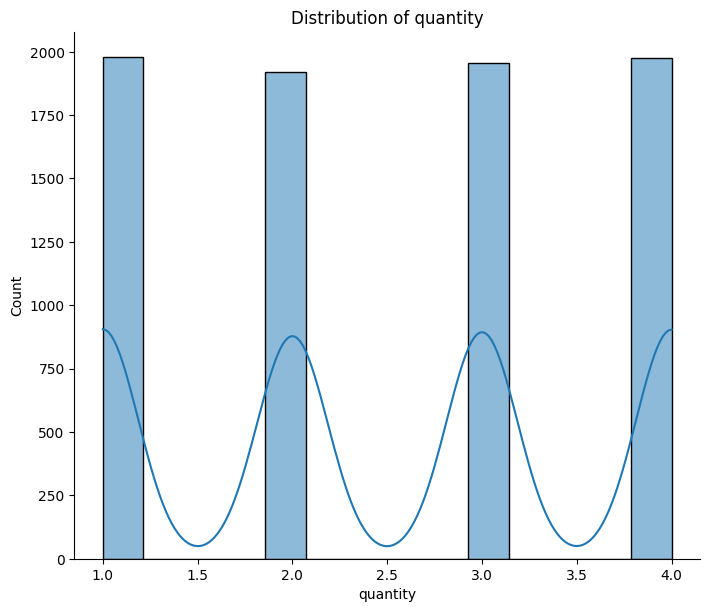

In [16]:
plot_continuous_distribution(df, 'quantity', 6)

The histogram indicates that the distribution of the `quantity` values is relatively even, with comparable numbers of transactions occurring for each quantity number. The bars in the histogram are roughly the same height for the quantities of 1, 2, 3, and 4.

This suggests that customers are purchasing products in relatively low quantities, with comparable numbers of transactions occurring for each quantity number. This could imply that the items being sold are ones that are typically bought in small quantities, such as groceries or household essentials.

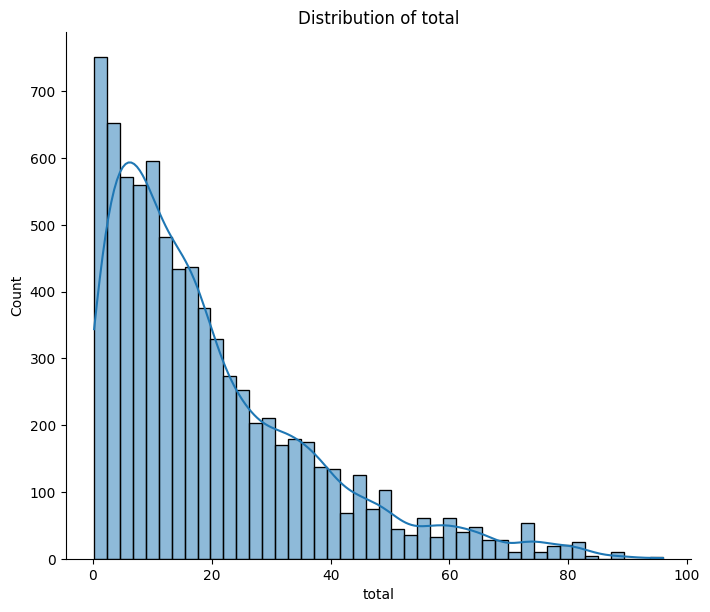

In [17]:
plot_continuous_distribution(df, 'total', 6)

The histogram plot of the total column in the DataFrame shows that the distribution is skewed toward the left side. This means that the majority of transactions have lower total amounts payable by the customers.

In [19]:
print (
       get_unique_values(df, 'transaction_id') ,
       get_unique_values(df, 'timestamp'),
       get_unique_values(df,  'product_id'),
       get_unique_values (df, 'category'),
       get_unique_values(df, 'customer_type'),
       get_unique_values(df,  'unit_price'),
       get_unique_values(df, 'quantity'),
       get_unique_values( df, 'total'),
       get_unique_values(df, 'payment_type')
       )

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64
Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64
Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9   

The transaction_id column has 7829 unique values, indicating that there are 7829 transactions in the DataFrame.

The timestamp column has 7738 unique values, indicating that there are 7738 unique timestamps in the DataFrame.

The product_id column has 300 unique values, indicating that there are 300 unique products in the DataFrame.

The category column has 22 unique values, indicating that there are 22 different categories of products in the DataFrame.

The customer_type column has 5 unique values, indicating that there are 5 different types of customers in the DataFrame.

The unit_price column has 64 unique values, indicating that there are 64 different unit prices for the products in the DataFrame.

The quantity column has 4 unique values, indicating that there are 4 different quantity values for the products in the DataFrame.

The total column has 256 unique values, indicating that there are 256 different total amounts payable by the customers in the DataFrame.

The payment_type column has 4 unique values, indicating that there are 4 different types of payment methods used by the customers in the DataFrame.

This information provides a broad overview of the different types of data that are present in the DataFrame and can be used to gain insights into the patterns and trends in the data.

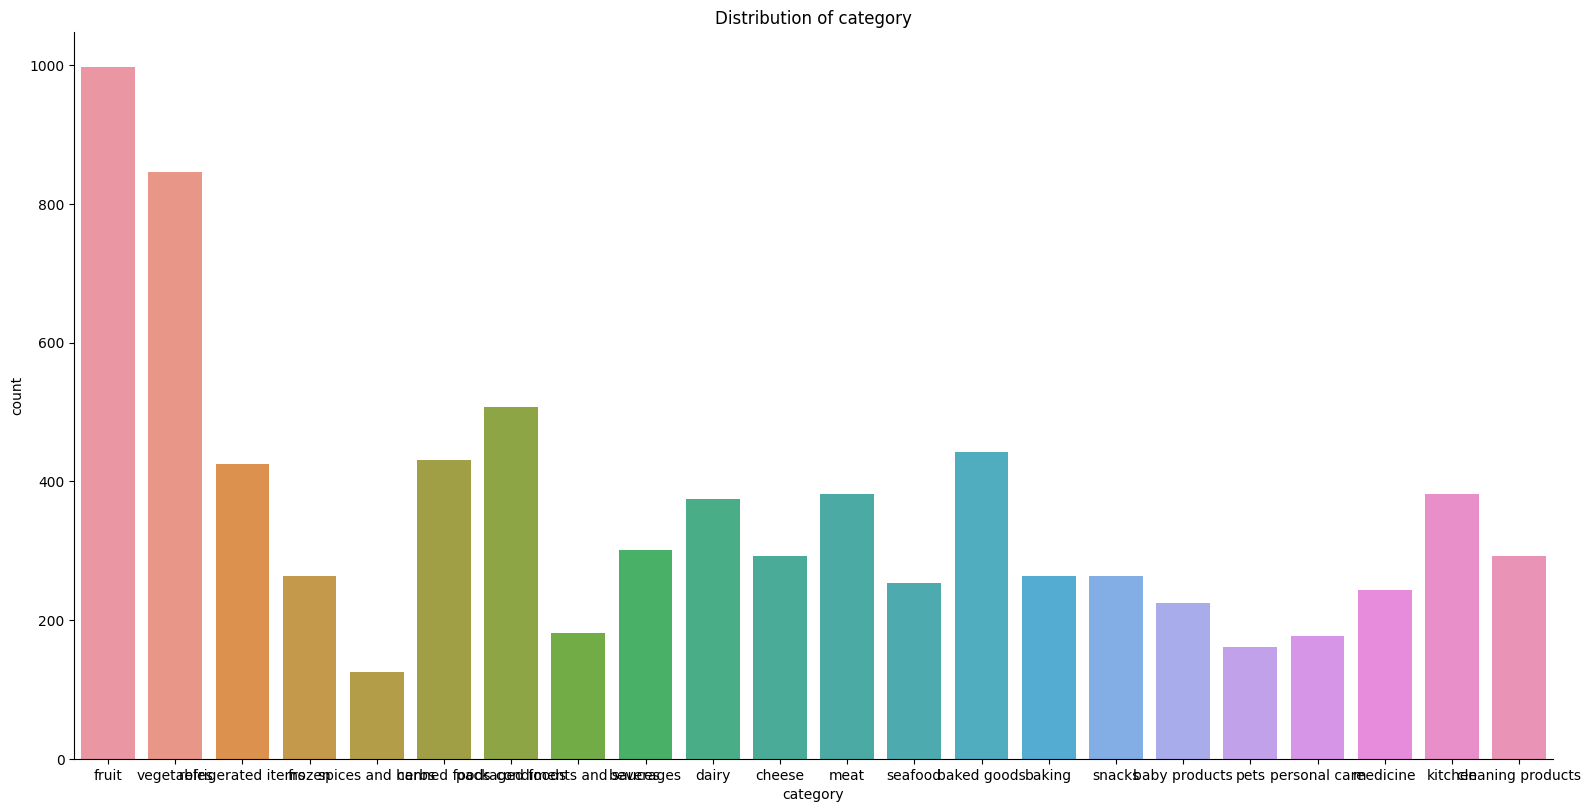

In [20]:
plot_categorical_distribution(df, 'category')


The `category` column in the DataFrame shows that the most commonly purchased products are in the categories of "fruit" and "vegetables", followed by "packaged foods", "baked goods", "canned foods", and "refrigerated items". These categories have a substantial number of transactions, indicating that they are popular among customers. On the other hand, the categories of "personal care", "pets", and "spices and herbs" have the lowest number of transactions, suggesting that these categories of products are less commonly purchased by customers. Understanding the distribution of product categories can help businesses to better understand their customers' preferences and adjust their inventory and marketing strategies accordingly.

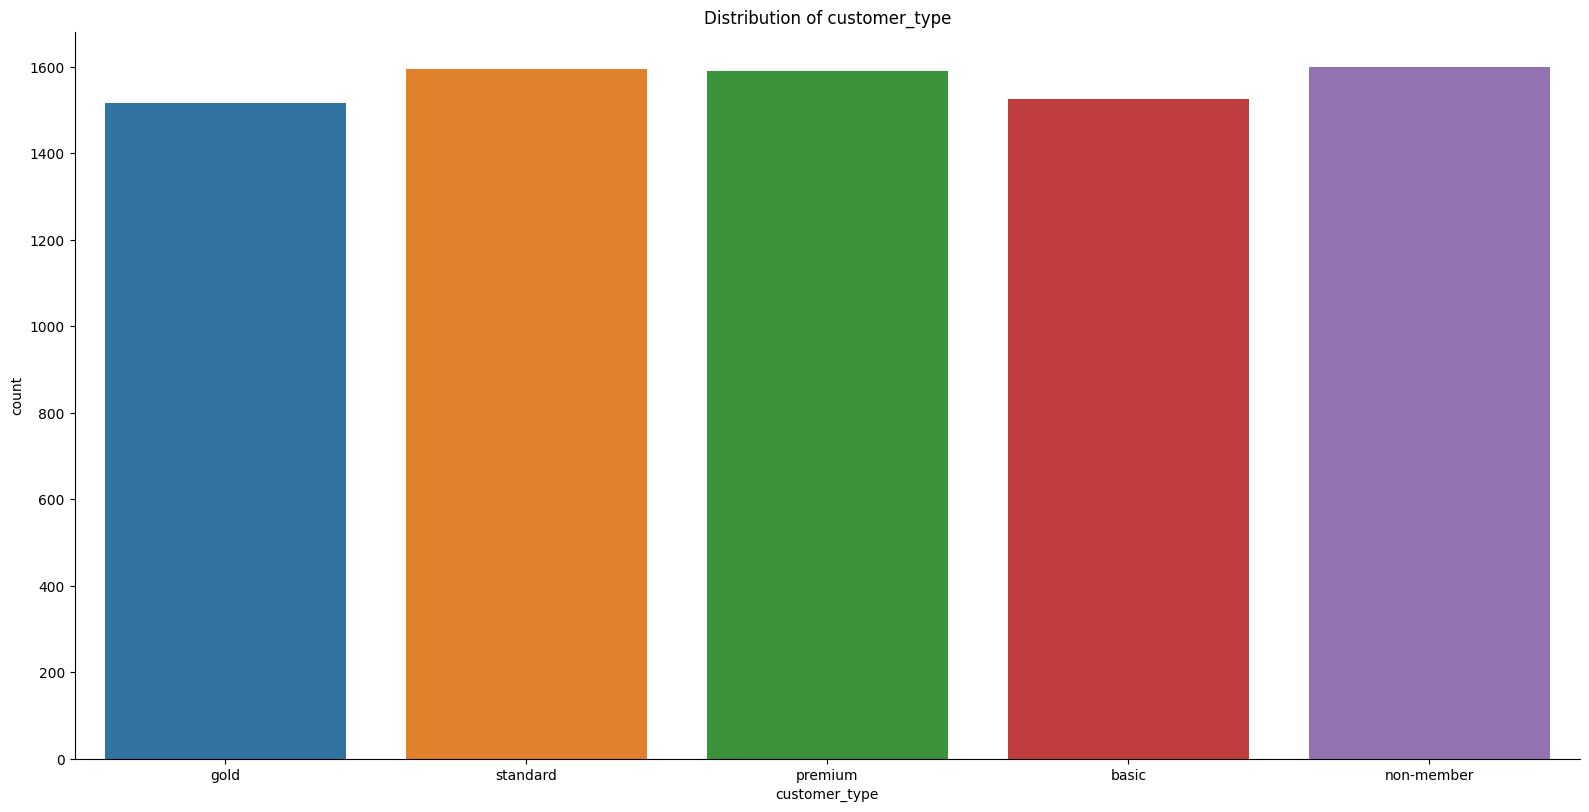

In [21]:
plot_categorical_distribution(df, 'customer_type')


The customer_type column in the DataFrame shows that there are five different types of customers: "non-member", "standard", "premium", "basic", and "gold". The output of get_unique_values function indicates that the number of transactions for each customer type is fairly evenly distributed. This suggests that there is no one type of customer that dominates the customer base and that the business has a relatively balanced mix of different customer types.



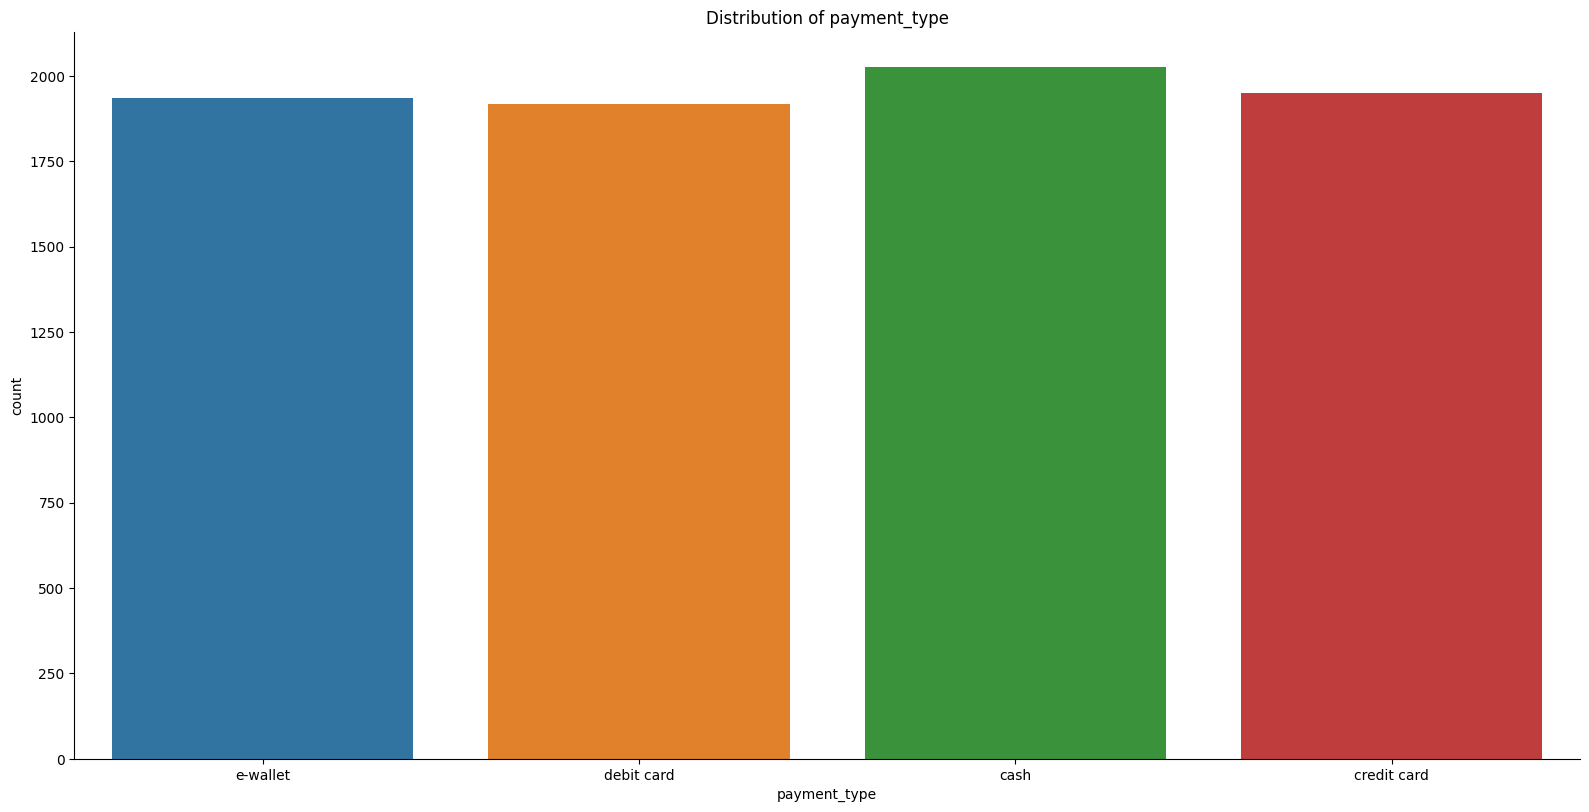

In [22]:
plot_categorical_distribution(df, 'payment_type')

The payment_type column in the DataFrame shows that there are four different types of payment methods used by customers: "cash", "credit card", "e-wallet", and "debit card". The output of get_unique_values function indicates that the number of transactions for each payment type is fairly evenly distributed. This suggests that there is no one dominant payment method used by customers and that the business accepts a variety of payment methods to accommodate customer preferences.

<ipython-input-35-5ec67f243bf2>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


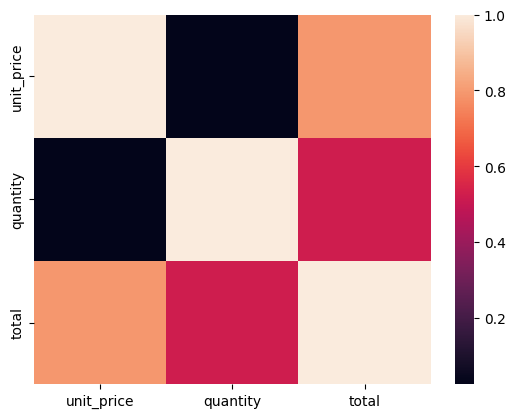

In [36]:
correlation_plot(df)


From plot, we can see that the "total" and "unit_price" columns have a high positive correlation, which suggests that as the unit price of a product increases, the total amount payable by the customer for that product also increases. This makes sense since the total amount payable is simply the product of the unit price and the quantity purchased.

On the other hand, the "quantity" and "unit_price" columns have a relatively low positive correlation, which suggests that there is not a strong relationship between the unit price of a product and the quantity purchased by the customer. This could be due to a variety of factors, such as the customer's budget, preferences, and needs.



---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

